In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv('./scratch/export.csv', encoding='windows-1250', sep=';')

In [4]:
#dropna
data.dropna(how='all', subset=['Lat', 'ObsLat'], inplace=True)
data.dropna(how='all', subset=['TaxonNameCZ'], inplace=True)

In [6]:
#omezeni na aktulalni dny
data = data[(data.Week > 28) & (data.Week < 32)]

kachna divoká


C:\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


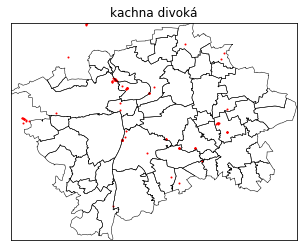

břehule říční


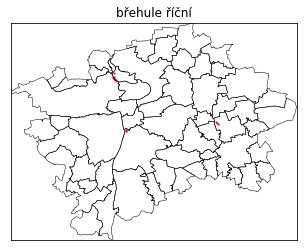

slípka zelenonohá


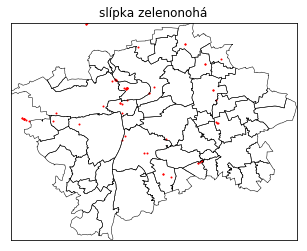

pěnice černohlavá


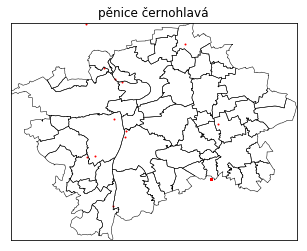

polák chocholačka


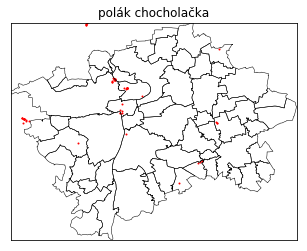

lyska černá


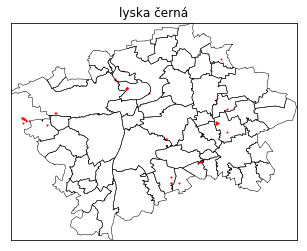

labuť velká


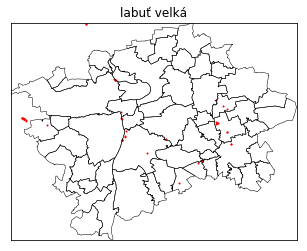

volavka popelavá


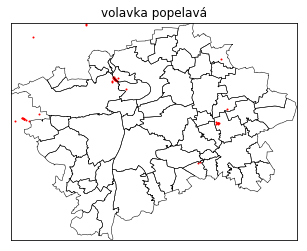

holub hřivnáč


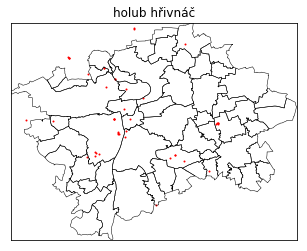

rorýs obecný


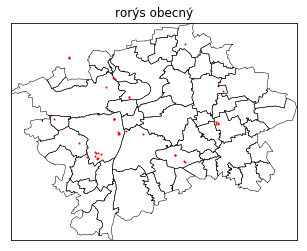

racek chechtavý


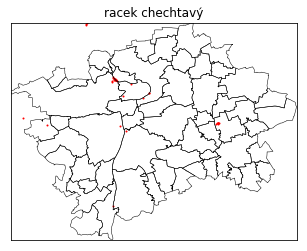

pisík obecný


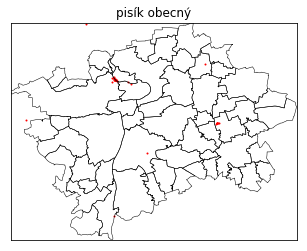

kos černý


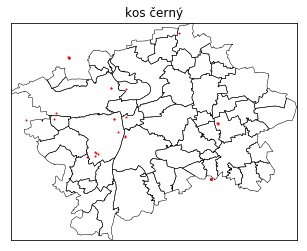

potápka malá


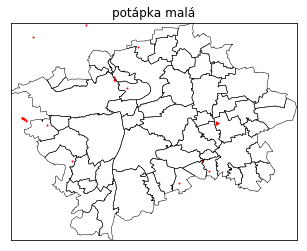

sýkora koňadra


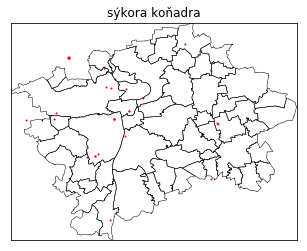

budníček menší


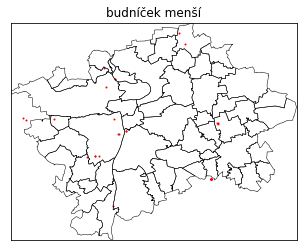

polák velký


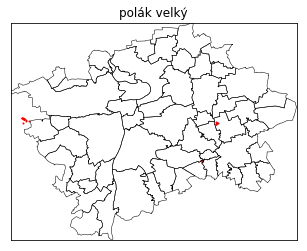

žluna zelená


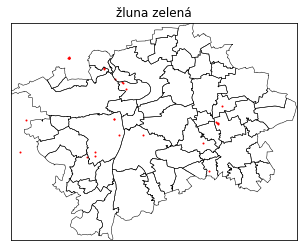

potápka roháč


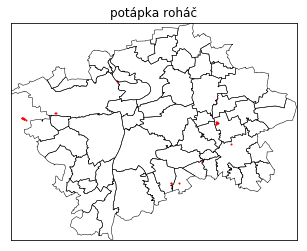

ledňáček říční


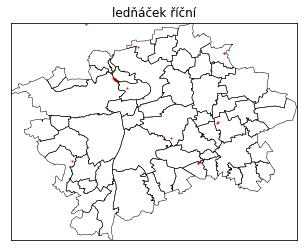

straka obecná


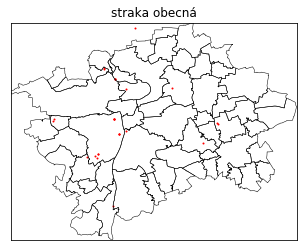

poštolka obecná


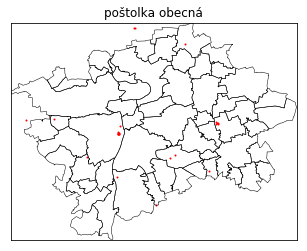

holub domácí


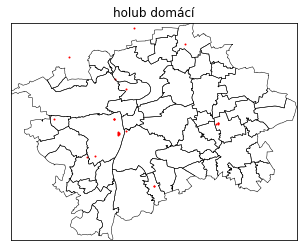

kvakoš noční


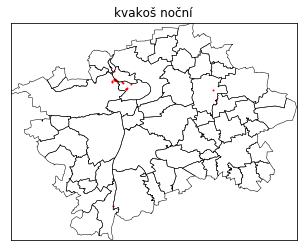

sojka obecná


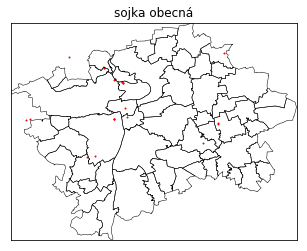

strakapoud velký


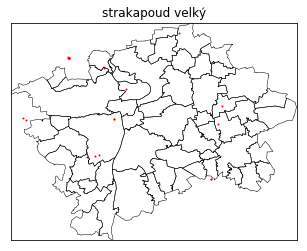

konipas bílý


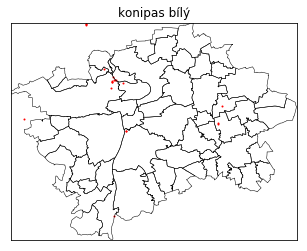

pěnice slavíková


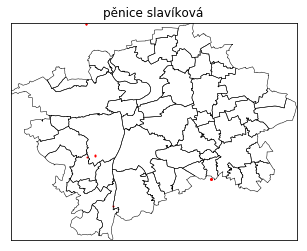

červenka obecná


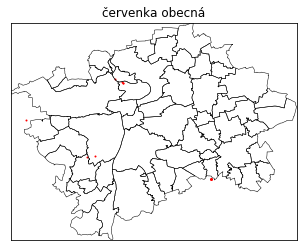

bažant obecný


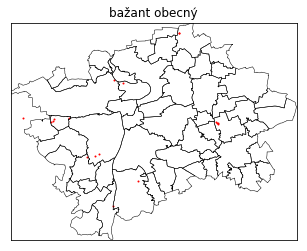

sýkora modřinka


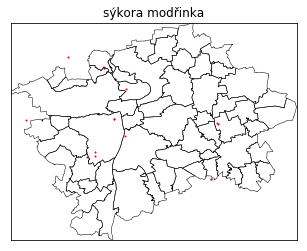

rehek domácí


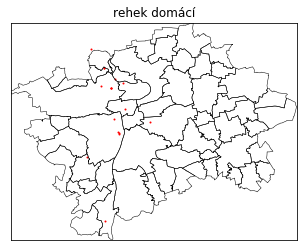

hrdlička zahradní


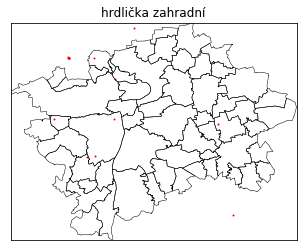

brhlík lesní


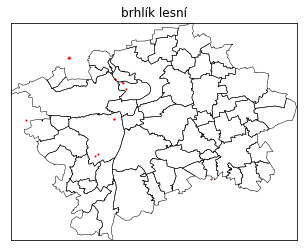

ústřičník velký


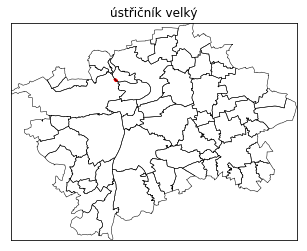

jiřička obecná


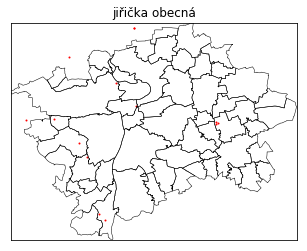

stehlík obecný


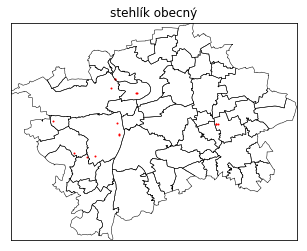

potápka černokrká


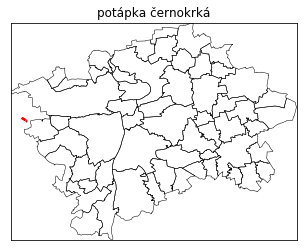

bukáček malý


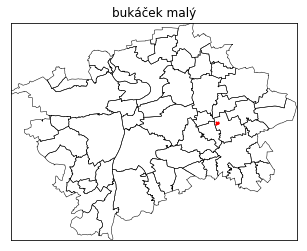

kormorán velký


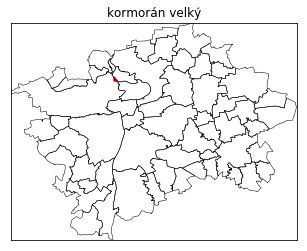

vlaštovka obecná


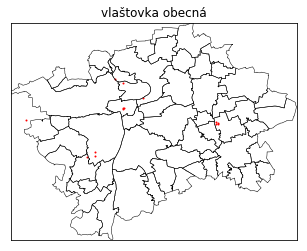

pěnice pokřovní


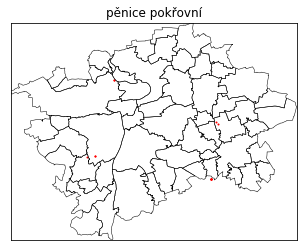

vrabec polní


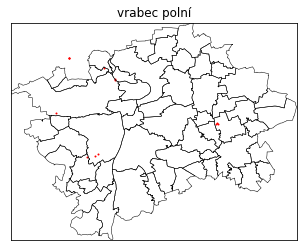

drozd zpěvný


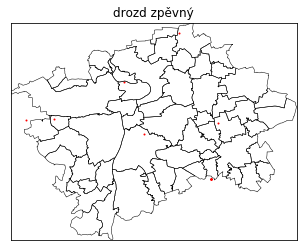

káně lesní


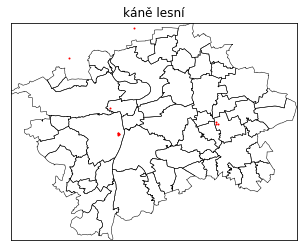

ťuhýk obecný


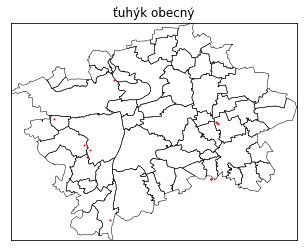

konipas horský


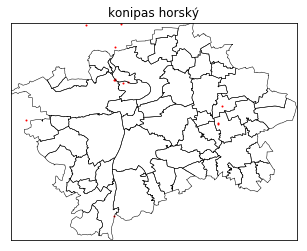

kavka obecná


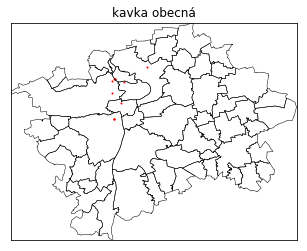

kulík říční


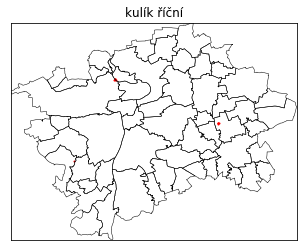

strnad obecný


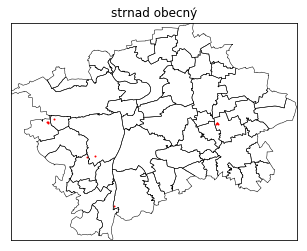

rákosník obecný


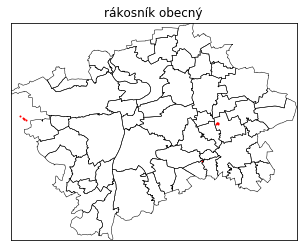

moták pochop


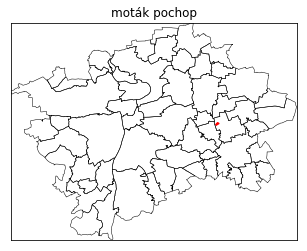

mlynařík dlouhoocasý


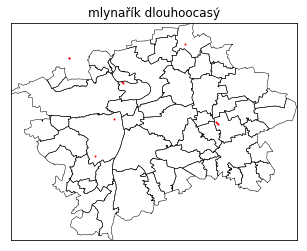

zvonek zelený


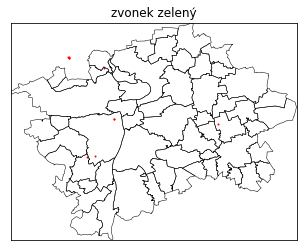

bekasina otavní


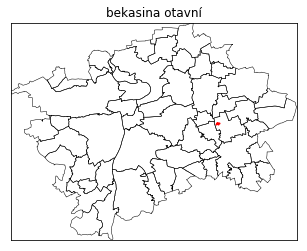

střízlík obecný


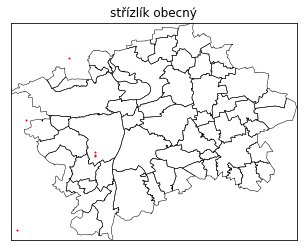

morčák velký


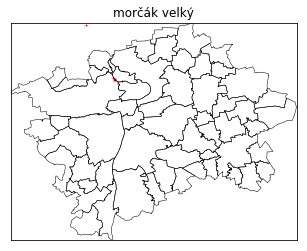

pěnkava obecná


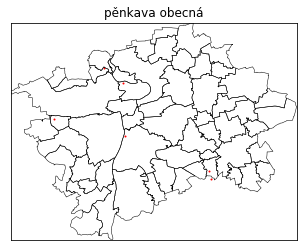

špaček obecný


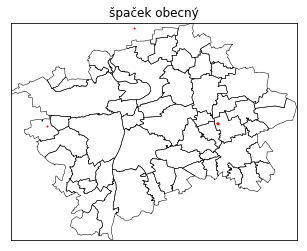

cvrčilka zelená


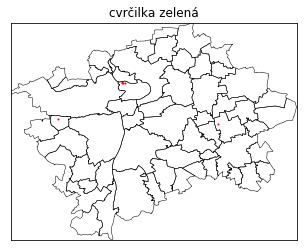

konopka obecná


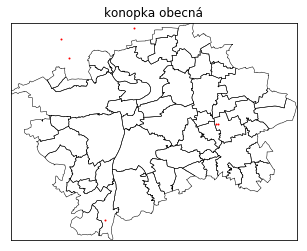

čejka chocholatá


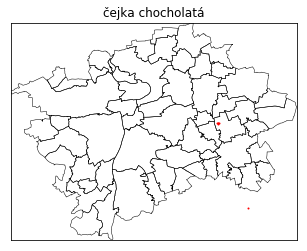

rehek zahradní


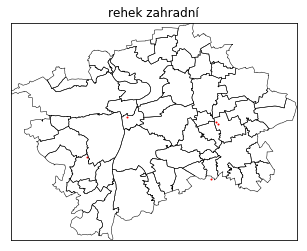

koroptev polní


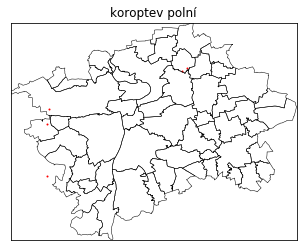

husice nilská


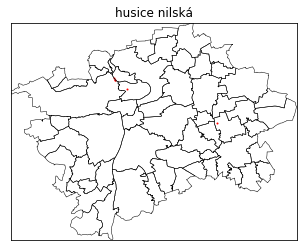

vodouš kropenatý


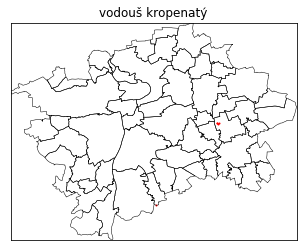

pěvuška modrá


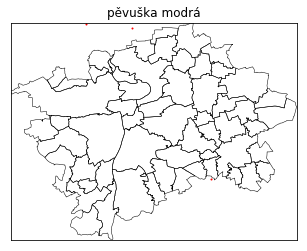

pěnice hnědokřídlá


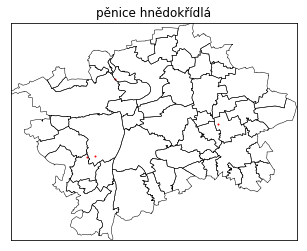

havran polní


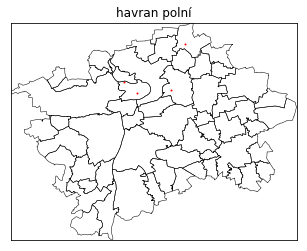

rákosník zpěvný


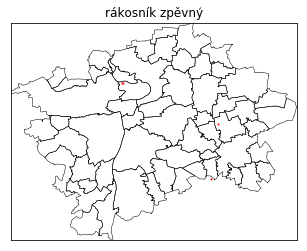

vrána obecná šedá


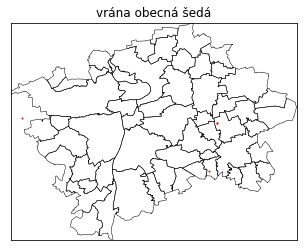

rákosník velký


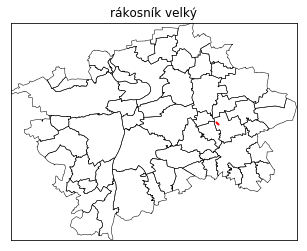

datel černý


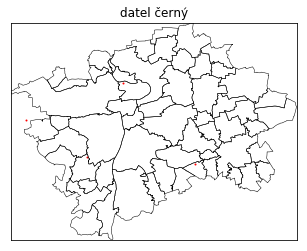

lejsek šedý


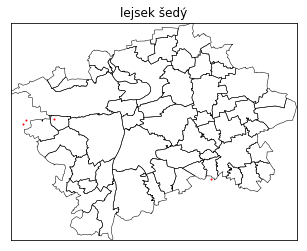

čáp černý


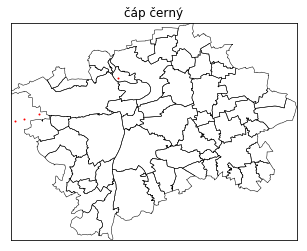

sokol stěhovavý


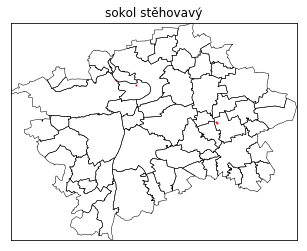

krahujec obecný


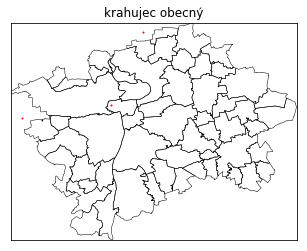

strnad rákosní


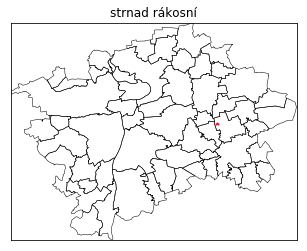

budníček větší


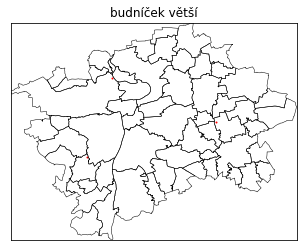

koliha velká


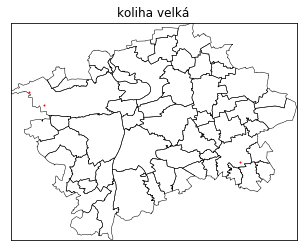

čírka obecná


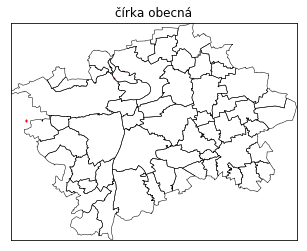

strakapoud malý


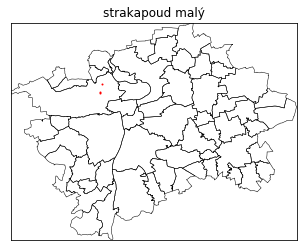

zvonohlík zahradní


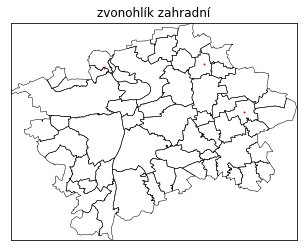

moták lužní


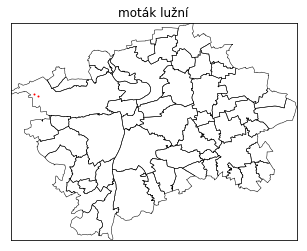

křepelka polní


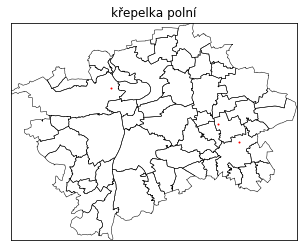

jespák obecný


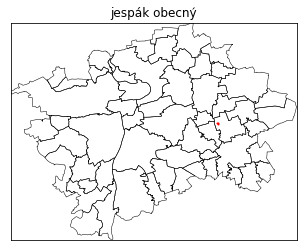

vrabec domácí


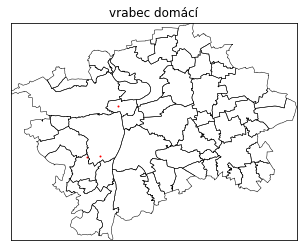

volavka bílá


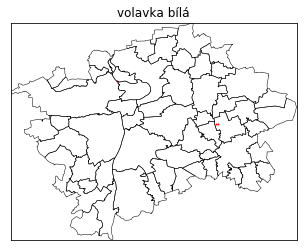

husa velká


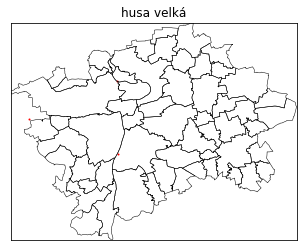

krkavec velký


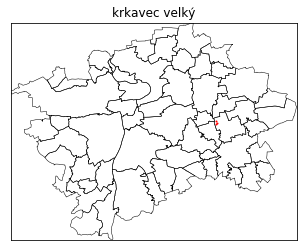

hvízdák eurasijský


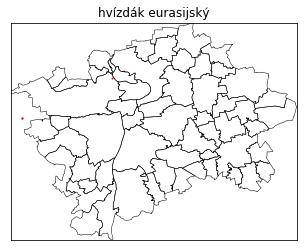

šoupálek sp.


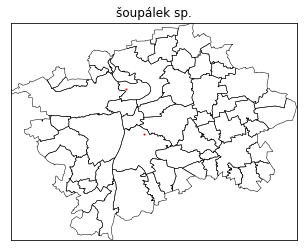

skřivan polní


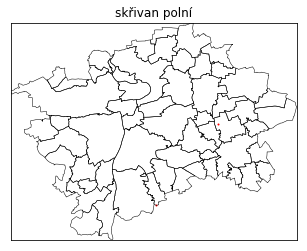

luňák hnědý


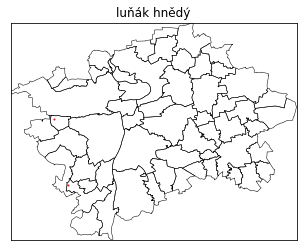

rybák obecný


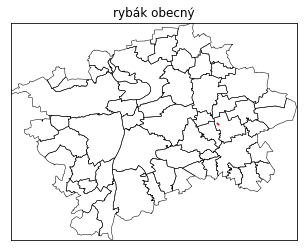

drozd brávník


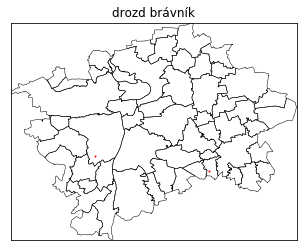

kopřivka obecná


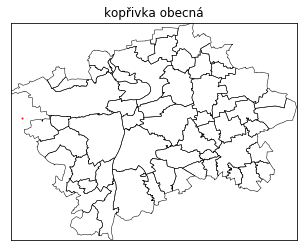

vrána obecná černá


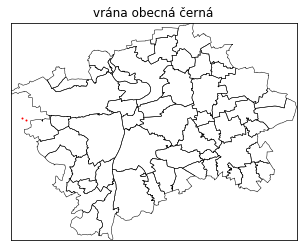

včelojed lesní


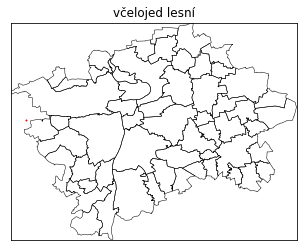

vodouš bahenní


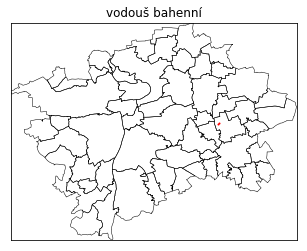

netopýr


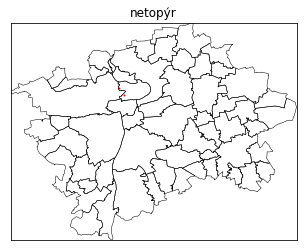

dudek chocholatý


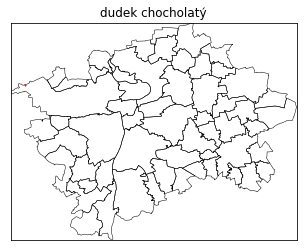

pižmovka domácí


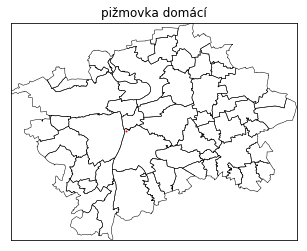

drozd kvíčala


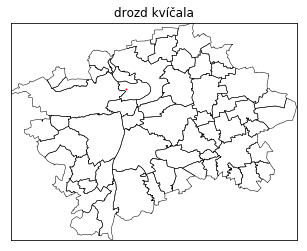

skorec vodní


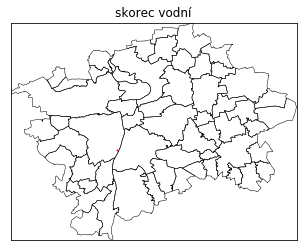

volavka stříbřitá


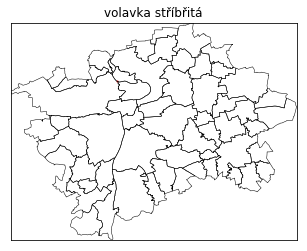

dlask tlustozobý


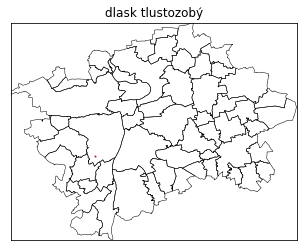

rákosník proužkovaný


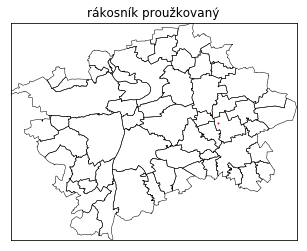

racek středomořský


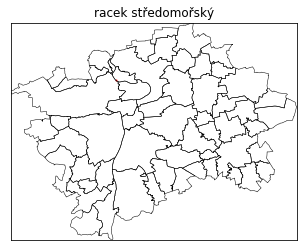

šoupálek krátkoprstý


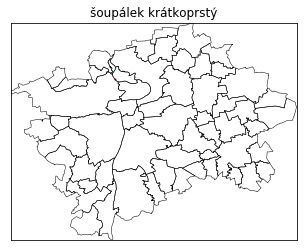

cvrčilka slavíková


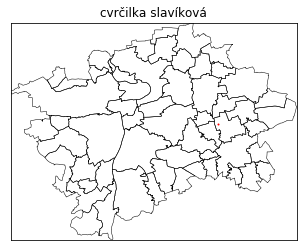

puštík obecný


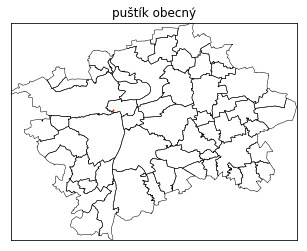

andulka vlnkovaná


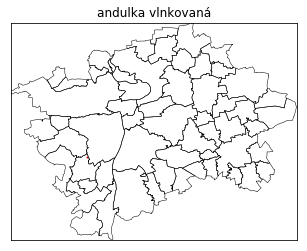

slavík modráček středoevropský


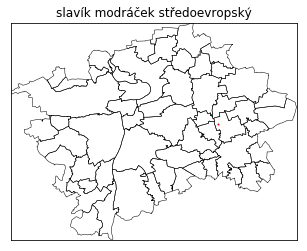

chřástal vodní


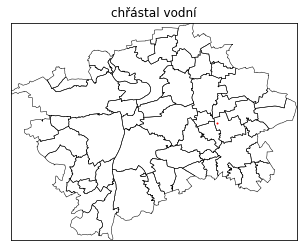

jestřáb lesní


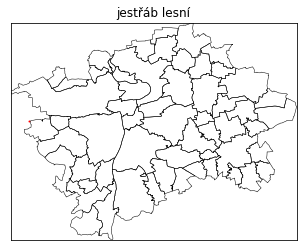

lžičák pestrý


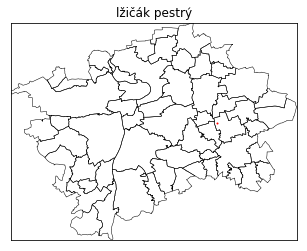

rosela pestrá


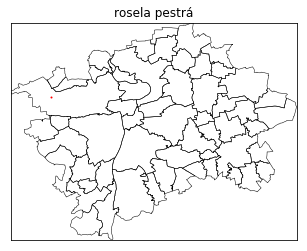

bramborníček hnědý


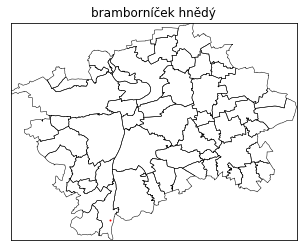

slavík obecný


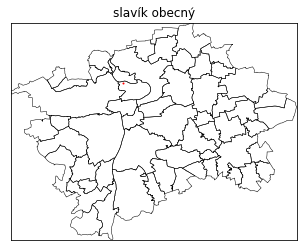

luňák červený


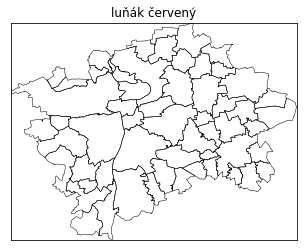

chřástal polní


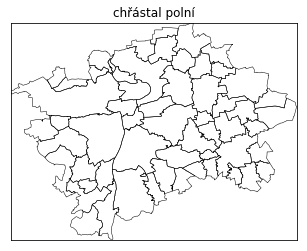

žluva hajní


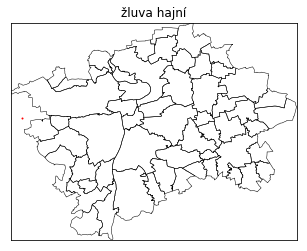

cvrčilka říční


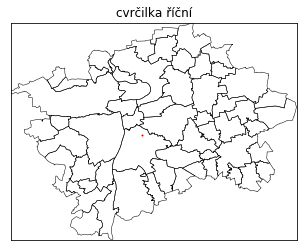

kukačka obecná


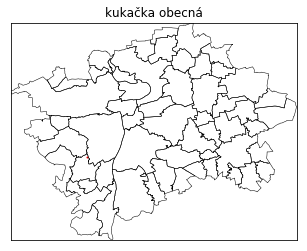

rybák černý


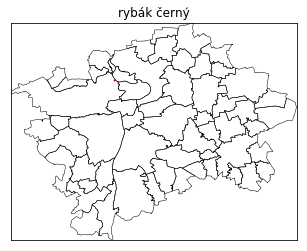

kalous ušatý


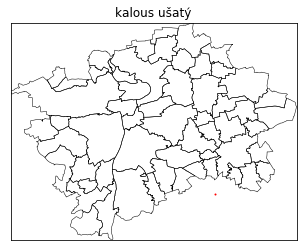

králíček obecný


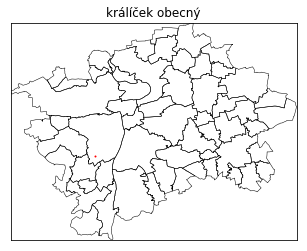

sýkora uhelníček


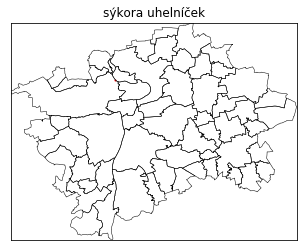

sýkora babka/lužní


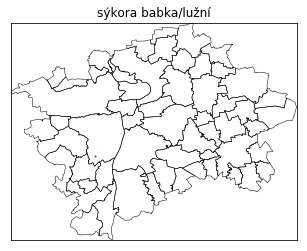

alexandr malý


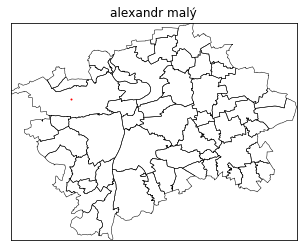

zrzohlávka rudozobá


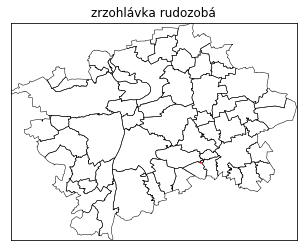

In [7]:
ordr = 0
for name in data.TaxonNameCZ.value_counts().keys():
    ordr += 1
    ser = data[data.TaxonNameCZ == name]
    plt.figure(ordr)
    map = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=50.0835494, lon_0=14.4341414,
            llcrnrlon=14.224453, llcrnrlat=49.941936, urcrnrlon=14.706795, urcrnrlat=50.177403)

    map.readshapefile('./scratch/mc/TMMESTSKECASTI_P', 'mc')
    
    x, y = map(ser.Lon.values, ser.Lat.values)

    map.scatter(x, y, 1, marker='o', color='r')
    plt.title(name)
    print(name)
    plt.show()